# Data Exploration

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pygsp
from pygsp import graphs, filters
import networkx as nx
import pickle
import collections
from numpy import linalg

In [5]:
#import the three directed graphs: 
G_1 = nx.read_gpickle('AlanRickman.gpickle')
G_2 = nx.read_gpickle('StanLee.gpickle')
G_3 = nx.read_gpickle('StephenHawking.gpickle')


In [6]:
Graphs=[G_1,G_2,G_3]

In [7]:
#make undirected versions
G_1_undir=G_1.to_undirected()
G_2_undir=G_2.to_undirected()
G_3_undir=G_3.to_undirected()
Graphs_undir=[G_1_undir, G_2_undir, G_3_undir]

In [8]:
#Adjacency matrices of undirected graphs
A_1 = nx.adjacency_matrix(G_1_undir).todense()
A_2 = nx.adjacency_matrix(G_2_undir).todense()
A_3 = nx.adjacency_matrix(G_3_undir).todense()

# Basic properties of the graphs


We study basic properties of the graphs such as number of nodes, number of edges, strongly connectedness, the diameter, the average clustering coefficient and number of triangles or global clustering coefficient 


In [9]:
#Number of nodes and edges for each graphs 
i=1
for G in Graphs: 
    print ('The graph G_{} has {} nodes and {} edges '. format(i, len(G.nodes),len(G.edges)))
    i+=1

The graph G_1 has 500 nodes and 3532 edges 
The graph G_2 has 500 nodes and 6892 edges 
The graph G_3 has 100 nodes and 255 edges 


In [10]:
# Check if the graphs are strongly connected (if not, diameter=infinity)
i=1
for G in Graphs :
    if nx.is_strongly_connected(G):
        print('The graph G_{} is strongly connected and its diameter is {}'.format(i, nx.diameter(G)))
    else: 
        print('The graph G_{} is not strongly connected'.format(i))
    i=1+1

The graph G_1 is not strongly connected
The graph G_2 is not strongly connected
The graph G_2 is not strongly connected


# Note:  Extract the strongly connected components and diameter of the largest strongly connected component

In [11]:
#return a list of nodes for the stronlgy connected components of a directed graph, how does this work??
i=1
for G in Graphs :
    strongcc=nx.strongly_connected_components(G)

In [12]:
strongcc

<generator object strongly_connected_components at 0x1a211f4990>

In [13]:
#compute the diameter of undirected graphs:
i=1
for G in Graphs_undir: 
    print('The diameter of the undirected graph G_{} is {}'.format(i, nx.diameter(G)))
    i+=1

The diameter of the undirected graph G_1 is 4
The diameter of the undirected graph G_2 is 4
The diameter of the undirected graph G_3 is 4


# Clustering coefficients and number of 

In [14]:
#compute average clustering coefficient: 
#Note: Do we do for the directed or undirected graphs???
i=1
for G in Graphs:
    print('The graph G_{} has average clustering coefficient {}'.format(i,nx.average_clustering(G)))
    i=i+1

The graph G_1 has average clustering coefficient 0.19374713498234902
The graph G_2 has average clustering coefficient 0.26879632622283434
The graph G_3 has average clustering coefficient 0.17648512749556652


In [15]:
#compute the number of triangles 
T_1=sum(nx.triangles(G_1_undir).values())/3
T_2=sum(nx.triangles(G_2_undir).values())/3
T_3=sum(nx.triangles(G_3_undir).values())/3

In [16]:
#compute number of three paths in the graphs
np.sum(np.linalg.matrix_power(A_1,3))
np.sum(np.linalg.matrix_power(A_2,3))
np.sum(np.linalg.matrix_power(A_3,3))

30376

In [17]:
#compute global clustering coefficient of the graphs
C_1=T_1/np.sum(np.linalg.matrix_power(A_1,3))
C_2=T_2/np.sum(np.linalg.matrix_power(A_2,3))
C_3=T_3/np.sum(np.linalg.matrix_power(A_3,3))

In [28]:
print('The graph G_1 has {} triangles and global clustering coefficient {}'. format(int(T_1), C_1))
print('The graph G_2 has {} triangles and global clustering coefficient {}'. format(int(T_2), C_2))
print('The graph G_3 has {} triangles and global clustering coefficient {}'. format(int(T_3), C_3))

The graph G_1 has 3745 triangles and global clustering coefficient 0.0008641476781078742
The graph G_2 has 24905 triangles and global clustering coefficient 0.0008849502807536301
The graph G_3 has 80 triangles and global clustering coefficient 0.002633658151171978


# Degree Distribution


question: as the graph is directed: do we compute the in-degree, out-degree or total degree?


In [19]:
#plot the degree histograms  
def plot_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Total Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [20]:
 #plot the in-degree histograms of a directed graph 
def plot_in_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("In-Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [21]:
#plot the out-degree histograms of a directed graph 
def plot_out_degree(G, name):
    degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Out-Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

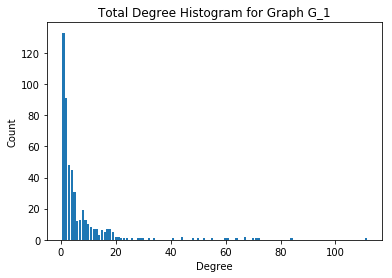

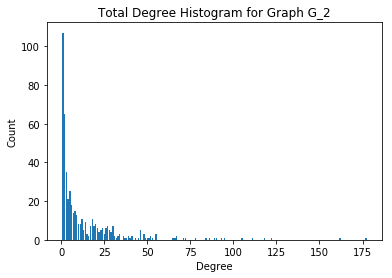

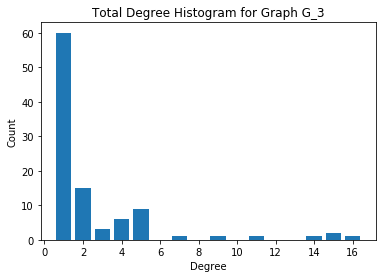

In [22]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_degree(G,name)
    i+=1

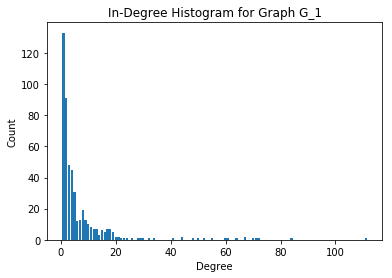

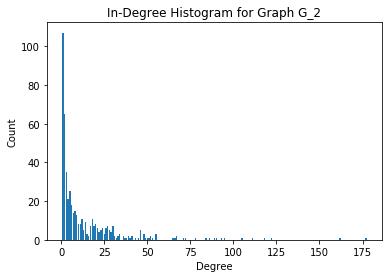

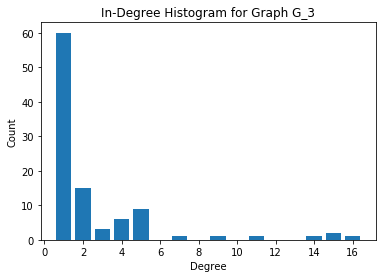

In [23]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_in_degree(G,name)
    i+=1

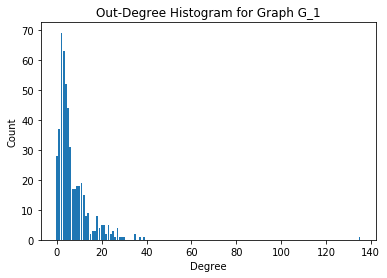

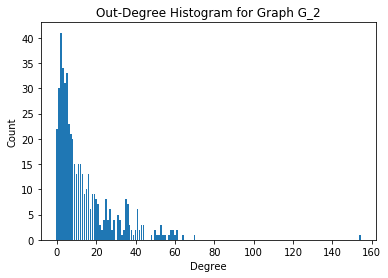

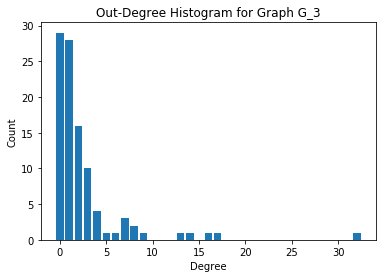

In [24]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_out_degree(G,name)
    i+=1

do we need this below?

In [25]:
def plot_distribution(degree):
    '''
    degree list: the list of node degrees
    network_type: string used for plotting the title
    '''
    fig = plt.figure()
    ax = plt.gca()
    bins = min(int(np.max(degree) - np.min(degree)), 100)
    a = plt.hist(degree, bins=bins, density=True)
    #log = True
    plt.xlabel('Degree')
    plt.ylabel('Probability of node having degree k')
    plt.title('Degree distribution for ')